# **Análise Exploratória**

- Inspecionar o dataset
- Estatísticas descritivas
- Distribuição de dados (esp. target)
- Pré-tratamento de dados p/efetuar análises, extrair insights (correlações, etc)

## Bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## Funções

In [18]:
# Configurar pandas para não exibir números em notação científica
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Função para ler ou gravar dados no banco SQL
def manage_db(operation, table_name, db_path, df=None):
    """
    Função para ler ou gravar dados no banco de dados SQLite 'house_prices.db'.

    Parâmetros:
    operation (str): 'r' para ler ou 'w' para gravar.
    table_name (str): Nome da tabela para ler ou gravar.
    df (pd.DataFrame, opcional): DataFrame para gravar na tabela (necessário se operação for 'w').

    Retorna:
    pd.DataFrame se operação for 'r'. None se operação for 'w'.
    """
   
    # conecta ao banco de dados
    conn = sqlite3.connect(db_path)

    # Se for operação de leitura
    if operation == 'r':
        query = f"SELECT * FROM {table_name}"
        df = pd.read_sql(query, conn)
        conn.close()
        return df
    
    # Se for operação de escrita (salvar df)
    elif operation == 'w' and df is not None:
        df.to_sql(table_name, conn, if_exists='replace', index=False)
        conn.close()
        return None
    
    else:
        conn.close()
        raise ValueError("Operação inválida ou DataFrame não fornecido para escrita.")
# ---------------------------------------------------------------------------------------

# Função para converter os tipos das colunas do dataset
def convert_column_types(dataframe, column_types:dict):

    df = dataframe.copy()
    
    for column, dtype in column_types.items():
        df[column] = pd.to_numeric(df[column], errors='coerce') if dtype in [int, float] else df[column].astype(dtype)
    return df
# ---------------------------------------------------------------------------------------

# Função para converter as colunas especificadas para o tipo 'category'
def convert_columns_to_category(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype('category')
    return df
# ---------------------------------------------------------------------------------------

## Carregando dados

In [5]:
df_train = manage_db(operation='r', table_name='df_train', db_path='data/house_prices.db')
df_train.head()

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,...,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,TradePrice
0,Pre-owned Condominiums etc.,,13103,Tokyo,Minato Ward,Kaigan,Takeshiba,1,1.0,1.0,...,,Quasi-industrial Zone,60.0,400.0,1st quarter 2011,2011,1,Done,,24000000
1,Residential Land(Land and Building),Residential Area,13120,Tokyo,Nerima Ward,Nishiki,Kamiitabashi,15,15.0,15.0,...,4.0,Category I Exclusively Low-story Residential Zone,60.0,200.0,3rd quarter 2013,2013,3,,Dealings including private road,51000000
2,Residential Land(Land Only),Residential Area,13201,Tokyo,Hachioji City,Shimoongatamachi,Takao (Tokyo),1H-1H30,60.0,90.0,...,4.5,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2007,2007,4,,,14000000
3,Pre-owned Condominiums etc.,,13208,Tokyo,Chofu City,Kamiishiwara,Nishichofu,16,16.0,16.0,...,,Quasi-industrial Zone,60.0,200.0,2nd quarter 2015,2015,2,Not yet,,23000000
4,Residential Land(Land Only),Residential Area,13117,Tokyo,Kita Ward,Shimo,Shimo,6,6.0,6.0,...,4.5,Category I Exclusively Medium-high Residential...,60.0,200.0,4th quarter 2015,2015,4,,,33000000


## Informações Gerais do Dataset

- Dimensões
- Nomenclatura de colunas
- Estatísticas Descritivas
- Presença de nulos, duplicados, outliers
- Checagem de tipos

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325260 entries, 0 to 325259
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Type                         325260 non-null  object
 1   Region                       325260 non-null  object
 2   MunicipalityCode             325260 non-null  object
 3   Prefecture                   325260 non-null  object
 4   Municipality                 325260 non-null  object
 5   DistrictName                 325260 non-null  object
 6   NearestStation               325260 non-null  object
 7   TimeToNearestStation         325260 non-null  object
 8   MinTimeToNearestStation      325260 non-null  object
 9   MaxTimeToNearestStation      325260 non-null  object
 10  FloorPlan                    325260 non-null  object
 11  Area                         325260 non-null  object
 12  AreaIsGreaterFlag            325260 non-null  object
 13  UnitPrice     

### Checagem de tipos

Todas as colunas estão no formato 'string'. Vamos convertê-las aos tipos corretos.

In [19]:
# Mapeando os tipos corretos das colunas
column_types = {
    'Type': str,
    'Region': str,
    'MunicipalityCode': int,
    'Prefecture': str,
    'Municipality': str,
    'DistrictName': str,
    'NearestStation': str,
    'TimeToNearestStation': str,
    'MinTimeToNearestStation': int,
    'MaxTimeToNearestStation': int,
    'FloorPlan': str,
    'Area': int,
    'AreaIsGreaterFlag': int,
    'UnitPrice': float,
    'PricePerTsubo': float,
    'LandShape': str,
    'Frontage': float,
    'FrontageIsGreaterFlag': int,
    'TotalFloorArea': int,
    'TotalFloorAreaIsGreaterFlag': int,
    'BuildingYear': int,
    'PrewarBuilding': int,
    'Structure': str,
    'Use': str,
    'Purpose': str,
    'Direction': str,
    'Classification': str,
    'Breadth': float,
    'CityPlanning': str,
    'CoverageRatio': int,
    'FloorAreaRatio': int,
    'Period': str,
    'Year': int,
    'Quarter': int,
    'Renovation': str,
    'Remarks': str,
    'TradePrice': int
}

df_train = convert_column_types(df_train, column_types)
df_train.dtypes

Type                            object
Region                          object
MunicipalityCode                 int64
Prefecture                      object
Municipality                    object
DistrictName                    object
NearestStation                  object
TimeToNearestStation            object
MinTimeToNearestStation        float64
MaxTimeToNearestStation        float64
FloorPlan                       object
Area                             int64
AreaIsGreaterFlag                int64
UnitPrice                      float64
PricePerTsubo                  float64
LandShape                       object
Frontage                       float64
FrontageIsGreaterFlag          float64
TotalFloorArea                 float64
TotalFloorAreaIsGreaterFlag      int64
BuildingYear                   float64
PrewarBuilding                   int64
Structure                       object
Use                             object
Purpose                         object
Direction                

### Estatística Descritiva

In [23]:
# estatísticas descritivas das colunas numéricas
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MunicipalityCode,325260.0000,13139.8000,46.1000,13101.0000,13110.0000,13117.0000,13201.0000,13421.0000
MinTimeToNearestStation,317002.0000,10.1900,7.9900,0.0000,5.0000,8.0000,13.0000,120.0000
MaxTimeToNearestStation,316879.0000,11.1200,11.6200,0.0000,5.0000,8.0000,13.0000,120.0000
Area,325260.0000,117.1700,204.3000,10.0000,50.0000,70.0000,115.0000,5000.0000
AreaIsGreaterFlag,325260.0000,0.0000,0.0600,0.0000,0.0000,0.0000,0.0000,1.0000
UnitPrice,63585.0000,425872.3400,476035.1500,4.0000,200000.0000,340000.0000,540000.0000,20000000.0000
PricePerTsubo,63585.0000,1407507.5900,1571121.5200,13.0000,680000.0000,1100000.0000,1800000.0000,66000000.0000
Frontage,162145.0000,9.6300,6.6100,0.5000,5.9000,8.0000,11.4000,50.0000
FrontageIsGreaterFlag,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalFloorArea,109005.0000,172.8300,268.1900,10.0000,85.0000,95.0000,120.0000,2000.0000


Algumas colunas, apesar de numéricas, na verdade representam categorias. Vamos exibir as estatísticas apenas das colunas realmente numéricas:

In [34]:
"""Convertendo colunas de categorias para o tipo CATEGORY
- ATENÇÃO: o Pandas não preserva o tipo category ao salvar em CSV.
- Ou seja, se você salvar em csv, depois de ler esse arquivo vai precisar fazer essa conversão para category novamente.
"""

# Lista de todas as colunas a serem convertidas para 'category'
columns_to_category = [
    'Type', 'Region', 'MunicipalityCode', 'Prefecture', 'Municipality',
    'DistrictName', 'NearestStation', 'FloorPlan', 'AreaIsGreaterFlag',
    'LandShape', 'FrontageIsGreaterFlag', 'TotalFloorAreaIsGreaterFlag',
    'BuildingYear','PrewarBuilding', 'Structure', 'Use', 'Purpose', 'Direction',
    'Classification', 'CityPlanning', 'Period', 'Year', 'Quarter', 'Renovation'
]

# Aplicar a função ao DataFrame df_train
df_train = convert_columns_to_category(df_train, columns_to_category)

# Exibir os tipos das colunas para verificar
print(df_train.dtypes)

Type                           category
Region                         category
MunicipalityCode               category
Prefecture                     category
Municipality                   category
DistrictName                   category
NearestStation                 category
TimeToNearestStation             object
MinTimeToNearestStation         float64
MaxTimeToNearestStation         float64
FloorPlan                      category
Area                              int64
AreaIsGreaterFlag              category
UnitPrice                       float64
PricePerTsubo                   float64
LandShape                      category
Frontage                        float64
FrontageIsGreaterFlag          category
TotalFloorArea                  float64
TotalFloorAreaIsGreaterFlag    category
BuildingYear                   category
PrewarBuilding                 category
Structure                      category
Use                            category
Purpose                        category


In [35]:
# estatísticas descritivas das colunas REALMENTE numéricas
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTimeToNearestStation,317002.0000,10.1921,7.9879,0.0000,5.0000,8.0000,13.0000,120.0000
MaxTimeToNearestStation,316879.0000,11.1168,11.6177,0.0000,5.0000,8.0000,13.0000,120.0000
Area,325260.0000,117.1717,204.3001,10.0000,50.0000,70.0000,115.0000,5000.0000
UnitPrice,63585.0000,425872.3408,476035.1482,4.0000,200000.0000,340000.0000,540000.0000,20000000.0000
PricePerTsubo,63585.0000,1407507.5921,1571121.5177,13.0000,680000.0000,1100000.0000,1800000.0000,66000000.0000
Frontage,162145.0000,9.6299,6.6108,0.5000,5.9000,8.0000,11.4000,50.0000
TotalFloorArea,109005.0000,172.8341,268.1946,10.0000,85.0000,95.0000,120.0000,2000.0000
Breadth,173966.0000,6.2479,4.8746,1.0000,4.0000,5.0000,6.0000,85.0000
CoverageRatio,320607.0000,62.1485,13.1330,30.0000,60.0000,60.0000,80.0000,80.0000
FloorAreaRatio,320607.0000,265.5521,159.6709,50.0000,150.0000,200.0000,300.0000,1200.0000


Salvando dataset com tipos corrigidos:

In [36]:
df_train.to_csv('data/train_corrected.csv', index=None)

### Tratamento de Nulos e Duplicados

#### Duplicados

In [38]:
# Duplicados
percentage_duplicates = df_train.duplicated().sum()/len(df_train)*100
print(f"Percentual de linhas duplicadas: {percentage_duplicates:.2f}%")

Percentual de linhas duplicadas: 0.76%


Como a quantidade de linhas duplicadas é pequena, vou remover essas linhas do dataset de Treino.

In [39]:
# Exibir o número de linhas ANTES da remoção
print(f"Número de linhas antes da remoção de duplicadas: {len(df_train)}")

# Remover linhas duplicadas
df_train.drop_duplicates(inplace=True)

# Exibir o número de linhas restantes após a remoção
print(f"Número de linhas após remoção de duplicadas: {len(df_train)}")

Número de linhas antes da remoção de duplicadas: 325260
Número de linhas após remoção de duplicadas: 322796


#### Valores Nulos

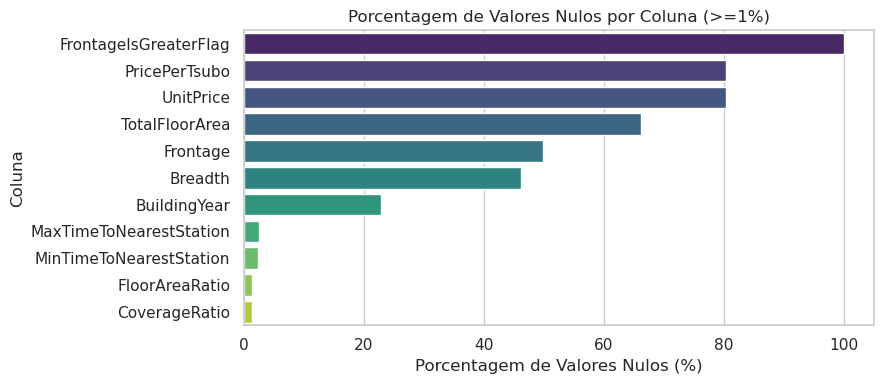

In [60]:
# Plotando o gráfico de quantidade de nulos - apenas das colunas com pelo menos 1% de nulos

# Calcular a porcentagem de valores nulos por coluna
null_percentage = df_train.isnull().mean() * 100

# Ordenar em ordem decrescente
null_percentage_sorted = null_percentage.sort_values(ascending=False)

# Filtrar colunas com pelo menos 1% de valores nulos
null_percentage_sorted = null_percentage_sorted[null_percentage_sorted >= 1]

# Criar DataFrame para o gráfico
plot_data = pd.DataFrame({
    'Column': null_percentage_sorted.index,
    'Null Percentage': null_percentage_sorted.values,
    'Hue': null_percentage_sorted.index  # Adicionar coluna para hue
})

# Criar o gráfico de barras horizontais
plt.figure(figsize=(9, 4))
ax = sns.barplot(x='Null Percentage', y='Column', data=plot_data, hue='Hue', palette="viridis", legend=False)

# Configurar o gráfico
ax.set_title("Porcentagem de Valores Nulos por Coluna (>=1%)")
ax.set_xlabel("Porcentagem de Valores Nulos (%)")
ax.set_ylabel("Coluna")

# Exibir o gráfico
plt.tight_layout()
plt.savefig('img/train_nulos.png')
plt.show()
plt.close()

**Política de tratamento de valores nulos:**
- **Colunas com mais de 70% nulos:** remover do dataset.
- **Colunas com 20% - 70% nulos:** imputar valores com método 
- **Colunas com menos de 20% nulos:** imputar valores com método simples (ex: moda, média)

### Tratamento de Outliers